In [1]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv("Documents/winemag-data_first150k.csv")

In [3]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
wine = wine.drop(['winery', 'region_1', 'region_2', 'designation'], axis=1)

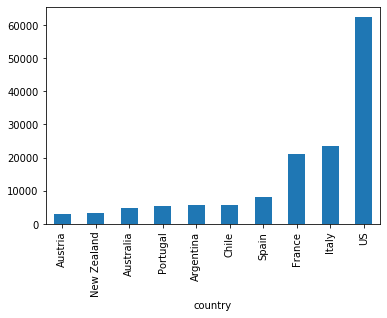

In [5]:
wine2 = wine.reset_index().groupby(['country'])['country'].count().sort_values().tail(10)
wine2.plot(kind='bar')
#sorting the wine counts by region, you can see that US is highest producing by a large amount

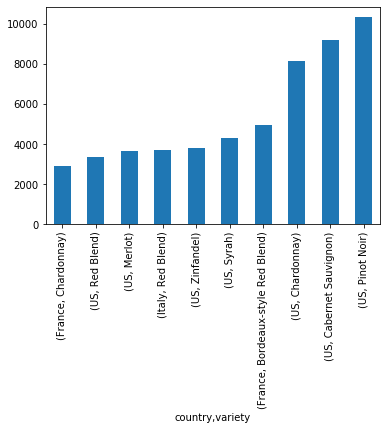

In [6]:
wine2 = wine.reset_index().groupby(['country', 'variety'])['country'].count().sort_values().tail(10)
wine2.plot(kind='bar')
#added in variety to see top wine types per regions - can see that pinot noir, cab sauv, and chardonnary are top from us. 
#france top wine is bordeaux 

In [7]:
wine.isna().any()
#quite a few columns with null values

Unnamed: 0     False
country         True
description    False
points         False
price           True
province        True
variety        False
dtype: bool

In [8]:
wine['country'].isna().sort_values().tail(20)
#looks like only 5 nans for country column - since data is 150K rows, going to ommit this potentially

50313     False
50301     False
50302     False
50303     False
50304     False
50305     False
50306     False
50314     False
50307     False
50308     False
50309     False
50310     False
50311     False
50312     False
150929    False
68226      True
1133       True
135696     True
1440       True
113016     True
Name: country, dtype: bool

In [9]:
wine['province'].isna().sort_values().tail(20)
#same as province, only a couple so may be removing

50313     False
50301     False
50302     False
50303     False
50304     False
50305     False
50306     False
50314     False
50307     False
50308     False
50309     False
50310     False
50311     False
50312     False
150929    False
68226      True
1133       True
135696     True
1440       True
113016     True
Name: province, dtype: bool

In [10]:
wine = wine.dropna(subset = ['country', 'province'])
wine.isna().any()
#can now see that only nans are price, which there are quite a few entries for. need to check further

Unnamed: 0     False
country        False
description    False
points         False
price           True
province       False
variety        False
dtype: bool

In [11]:
wine['price'].isna().sum()
#there are over 13000 nans for price, which is pretty high to ommit. Need to explore options for nans such as ffill or using an average to fill
#i am considering replacing the nan value with the mean but would may wanto to use the mean for each variety 

13695

In [12]:
np.mean(wine['price'])
#the mean price is 33.13 across all varieties

33.132019237776

In [13]:
wine['price'].describe()
#running summary statistics I can see the mean is 33 but the STD is 36, which is pretty high. I think it might be good to using mean by variety

count    137230.000000
mean         33.132019
std          36.323072
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [14]:
wine['price'] = wine['price'].fillna(wine.groupby('variety')['price'].transform('mean'))
#fill nan values from the price column with mean price per variety - think this will be more accurate than just using a blanket mean 

In [15]:
wine['price'].describe()
#we can see mean and STD stay similiar, which is good as data was not changed much

count    150904.000000
mean         33.543657
std          34.950624
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [16]:
wine.isna().any()
#checking for NANs left in the price column, I can see there are still some present. checking the value, they total to 21, which means these were unique varieties and did not have a similar wine to mirror

Unnamed: 0     False
country        False
description    False
points         False
price           True
province       False
variety        False
dtype: bool

In [17]:
wine['price'].isna().sum()
#due to the lower volume of nans persisting in the price column, I am going to drop these values. 

21

In [18]:
wine = wine.dropna(subset = ['price'])
wine.isna().any()
#can see that all NANs are removed from dataset 

Unnamed: 0     False
country        False
description    False
points         False
price          False
province       False
variety        False
dtype: bool

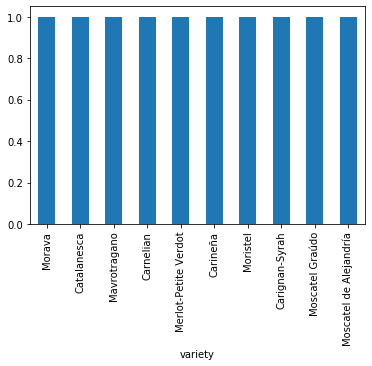

In [19]:
#want to do some exploration on the prices for varieties to see if there are potential outliers 
wine3 = wine.reset_index().groupby(['variety'])['variety'].count().sort_values()
wine3.head(10).plot(kind='bar')
#just doing some exploration there are definitely varietals that are region specific and thus have low counts

In [20]:
wine3.count() #shows 619 different varieties
wine3.describe()
#looking at some statisitics we can see that 75% of data is made up of varietals that have 38 reviews and the max is 14482 reviews
#also the mean is 243 which means there are on average 243 reviews for a given varietal
#the spread of data is very large as can be seen with a STD of 1228. 

count      619.000000
mean       243.786753
std       1228.558691
min          1.000000
25%          3.000000
50%          8.000000
75%         38.500000
max      14482.000000
Name: variety, dtype: float64

In [21]:
wine3.tail(20)
#you can see even just by looking at top 20 wine varietals, the range is quite large, ranging from 144482 - 1682 - outliers 
#could prove to be a problem but will re-evaluate once I begin the NLP section 

variety
Corvina, Rondinella, Molinara     1682
Shiraz                            1970
Sparkling Blend                   2004
Portuguese Red                    2216
Nebbiolo                          2241
Tempranillo                       2556
Rosé                              2817
White Blend                       2824
Malbec                            3208
Sangiovese                        3345
Zinfandel                         3799
Merlot                            5070
Riesling                          5524
Syrah                             5825
Sauvignon Blanc                   6320
Bordeaux-style Red Blend          7347
Red Blend                        10061
Cabernet Sauvignon               12800
Pinot Noir                       14288
Chardonnay                       14482
Name: variety, dtype: int64

In [22]:
#starting nlp section of EDA - going to play around with tokenization to see what results I get. also going to generate word clouds
import nltk.corpus
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
text = wine['description'].to_string()
tokens = [w for w in word_tokenize(text.lower())if w.isalpha()]

In [23]:
from collections import Counter
Counter(tokens).most_common(2)
#using counter on tokenized description column, and and a are most common so need to remove stopwords 

[('and', 63265), ('a', 62623)]

In [24]:
stops = set(stopwords.words("english"))
meaningful_words = [w for w in tokens if not w in stops]
Counter(meaningful_words).most_common(5)
#removed stopwords and can see top words are wine, aromas, ripe, blend, fruit. may want to remove wine, aromas, ripe, and blend
#as stop words since those are not very descriptive 

[('wine', 25218),
 ('aromas', 13006),
 ('ripe', 7584),
 ('blend', 6836),
 ('fruit', 6499)]

In [25]:
rem_words = ["wine", "aromas", "blend"]
stops = set(stopwords.words("english") + rem_words)
wine_words = [w for w in tokens if not w in stops]
Counter(wine_words).most_common(5)
#removed wine, aromas, ripe, blend, and fruit as stop words and can see nose, rich, dry, soft, sweet are comming up  - 
#think it might be good to look at a wordcloud to get a large overview of words. 

[('ripe', 7584),
 ('fruit', 6499),
 ('nose', 6106),
 ('rich', 6077),
 ('dry', 5628)]

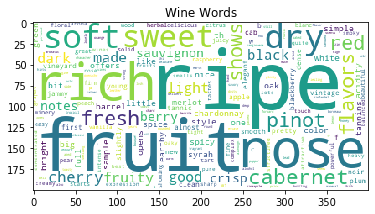

In [26]:
from wordcloud import WordCloud
wine_count = Counter(wine_words)
wc = WordCloud(background_color='white').generate_from_frequencies(wine_count)
plt.title("Wine Words")
plt.imshow(wc)
#made a word cloud of top words to see a larger picture - this is not focusing on specific varieties. Can see that nose, rich, dry
#are very popular. Soft, sweet, fresh cabernet are other wines. Need to remove other words such as shows, made, good, flavors to pick
#out the true descriptive words

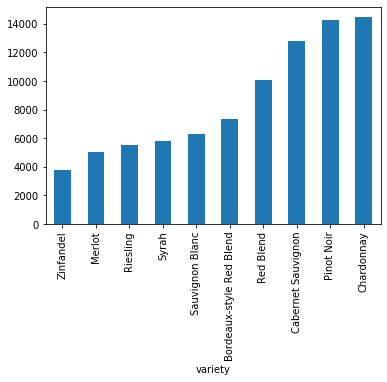

In [27]:
#lets look at top varieties and see if we can pull out most descriptive words
wine3.tail(10).plot(kind='bar')
#can see that chardonnary and pinot noir are most popular - let's look at those descriptive words

In [28]:
chard = wine[wine.variety == 'Chardonnay']
chard_text = chard['description'].to_string()
tokens = [w for w in word_tokenize(chard_text.lower())if w.isalpha()]
chard.head()

,Unnamed: 0,country,description,points,price,province,variety
15,15,US,"First made in 2006, this succulent luscious Ch...",95,90.0,Oregon,Chardonnay
23,23,US,The apogee of this ambitious winery's white wi...,95,60.0,California,Chardonnay
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",94,57.0,Kumeu,Chardonnay
31,31,US,"Steely and perfumed, this wine sees only 20% n...",90,37.0,California,Chardonnay
34,34,US,"The aromas entice with notes of wet stone, hon...",90,42.0,Washington,Chardonnay


In [29]:
chard_words = [w for w in tokens if not w in stops]
Counter(chard_words).most_common(5)
#so looking at top words, can see rich, chard, oak, nose, and apple - this is showing more descriptive words, which is good

[('chardonnay', 2079),
 ('ripe', 1112),
 ('rich', 953),
 ('fruit', 800),
 ('chard', 722)]

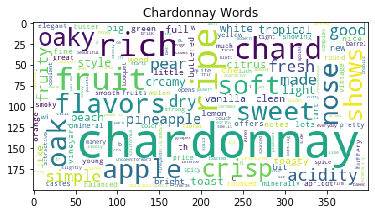

In [30]:
#chardonnay word cloud
chard_count = Counter(chard_words)
wc = WordCloud(background_color='white').generate_from_frequencies(chard_count)
plt.title("Chardonnay Words")
plt.imshow(wc)
#word cloud is helping to show more trends in words, can see some descriptive words stand out like oak and apple
#may want to remove words like nose, rich, swee, soft as these are pretty generic 

In [31]:
chard_rem = ['nose', 'rich', 'shows', 'sweet', 'soft', 'flavors', 'chardonnay']
stops = set(stopwords.words("english") + chard_rem + rem_words)
chard_words = [w for w in tokens if not w in stops]
Counter(chard_words).most_common(10)
#after removing more stop words, can see that chard, oak, apple, crisp are some type descriptive words for chardonnay 
#will want to see if this can predict the wine type 

[('ripe', 1112),
 ('fruit', 800),
 ('chard', 722),
 ('oak', 658),
 ('apple', 577),
 ('crisp', 494),
 ('oaky', 484),
 ('acidity', 472),
 ('dry', 423),
 ('fresh', 401)]

In [32]:
#want to recreate the same steps for pinot noir which is the next popular wine type to see how the words differ - this is
#important to see if the descriptive words can be used to predict wine type
pinot = wine[wine.variety == 'Pinot Noir']
pinot_text = pinot['description'].to_string()
tokens = [w for w in word_tokenize(pinot_text.lower())if w.isalpha()]
pinot.head()

,Unnamed: 0,country,description,points,price,province,variety
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir
8,8,US,This re-named vineyard was formerly bottled as...,95,65.0,Oregon,Pinot Noir
9,9,US,The producer sources from two blocks of the vi...,95,60.0,California,Pinot Noir
11,11,US,"From 18-year-old vines, this supple well-balan...",95,48.0,Oregon,Pinot Noir
12,12,US,A standout even in this terrific lineup of 201...,95,48.0,Oregon,Pinot Noir


In [33]:
pinot_words = [w for w in tokens if not w in stops]
Counter(pinot_words).most_common(5)
#so looking at top words, can see pinot and noir are coming up - need to remove them - let's create a word cloud to see if anything else should be removed

[('pinot', 2908), ('noir', 1436), ('dry', 723), ('cherry', 716), ('ripe', 690)]

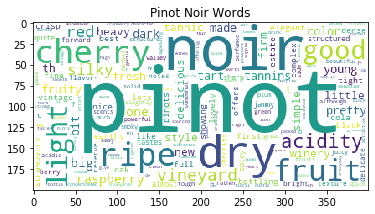

In [34]:
#pinot noir word cloud
pinot_count = Counter(pinot_words)
wc = WordCloud(background_color='white').generate_from_frequencies(pinot_count)
plt.title("Pinot Noir Words")
plt.imshow(wc)
#so can definitely see pinot noir neds to be removed, also need to remove good, acitiy, vineyard - i'm going to keep dry for now
#because i know this variety is a dry wine and may be somewhat descriptive 

In [35]:
pinot_rem = ['pinot', 'noir', 'good', 'vineyard', 'acidity', 'made']
stops = set(stopwords.words("english") + chard_rem + rem_words + pinot_rem)
pinot_words = [w for w in tokens if not w in stops]
Counter(pinot_words).most_common(10)
#after removing stop words, can see that cherry, dry, silky, raspberry, tart are some good descriptive words that differ from
#chardonnary - hopefully will be able to build models off of this 

[('dry', 723),
 ('cherry', 716),
 ('ripe', 690),
 ('fruit', 583),
 ('light', 535),
 ('red', 410),
 ('silky', 369),
 ('raspberry', 363),
 ('one', 354),
 ('big', 347)]

In [36]:
#from gensim.models.tfidfmodel import TfidfModel 
#from gensim.corpora.dictionary import Dictionary
#going to check out creating a corpus and tfidfmodel 
#tokenized_wine = set([word_tokenize(doc.lower())for doc in text])
#wine_dict = Dictionary(wine_words)

In [37]:
#model = TfidfModel(wine_count)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

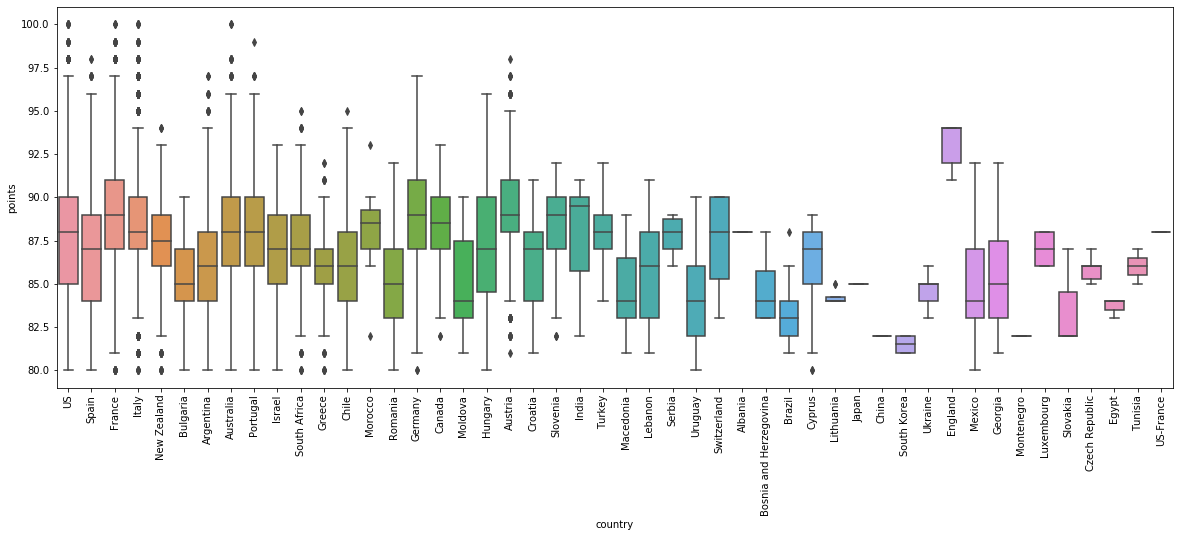

In [38]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=wine, ax=ax)
plt.xticks(rotation = 90)
#wanted to do some comparison on points distributions for regions as this might be good to model along with the descriptions
#can see that US, France, and Italy have high ranking wines but also dont have necessarily high means

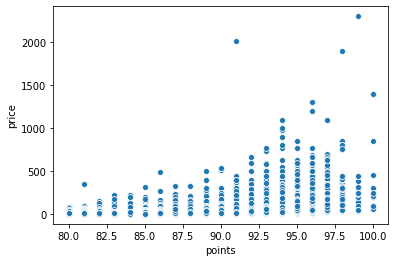

In [39]:
#also wanted to compare the points and prices to see if there is a correlation since I will need to do start some statisitcal testing
sns.scatterplot(y='price', x='points', data=wine)
#hard to tell if there is a correlation based on the outliers (there is a bottle wine priced at 2500), I'm going to remove 
#anything priced over 100 and re-graph

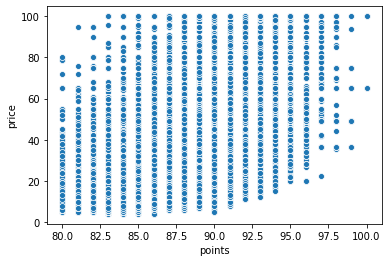

In [40]:
wine_scat = wine[wine.price <= 100]
sns.scatterplot(y='price', x='points', data=wine_scat)
#removing the outliers for price, we can see that there is a correlation between points and price so may be good to model

In [41]:
#want to look at the word cloud/ tokens for another popular variety (cab sauv)
cab_sauv = wine[wine.variety == 'Cabernet Sauvignon']
cab_text = cab_sauv['description'].to_string()
tokens = [w for w in word_tokenize(cab_text.lower())if w.isalpha()]

In [42]:
cab_words = [w for w in tokens if not w in stops]
Counter(cab_words).most_common(5)
#so similar to the above wines, need to remove the cab/ cabernet

[('cabernet', 2137),
 ('cab', 1123),
 ('ripe', 694),
 ('dry', 687),
 ('fruit', 535)]

In [43]:
cab_rem = ['cabernet', 'cab', 'sauvignon']
stops = set(stopwords.words("english") + chard_rem + rem_words + pinot_rem + cab_rem)
cab_words = [w for w in tokens if not w in stops]
Counter(cab_words).most_common(10)
#re-running the words, can see that we have good descriptive words now such as black, cherry, tannic, blackberry, dark

[('ripe', 694),
 ('dry', 687),
 ('fruit', 535),
 ('black', 451),
 ('cherry', 442),
 ('tannic', 420),
 ('blackberry', 416),
 ('tannins', 387),
 ('dark', 351),
 ('bit', 312)]

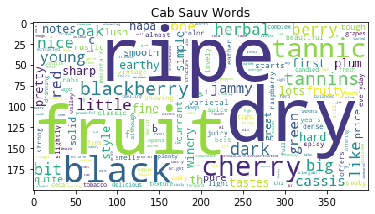

In [44]:
cab_count = Counter(cab_words)
wc = WordCloud(background_color='white').generate_from_frequencies(cab_count)
plt.title("Cab Sauv Words")
plt.imshow(wc)
#word cloud for cab sauv shows nice display, can also see herbal, jammy, plum, earthy are other big words 

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lacey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
#going to try some text pre-processing steps before jumping into models
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#def lemmatize_text(text):
   # return [lemmatizer.lemmatize(w) for w in wine_words]
lemmatized_output = [lemmatizer.lemmatize(w) for w in wine_words]

In [47]:
Counter(lemmatized_output).most_common(10)
#these are my lemmatized 10 most common words from the regular wine list. comparing with the original list, it does
#not look like this changed too much 

[('ripe', 7584),
 ('fruit', 7524),
 ('nose', 6109),
 ('rich', 6079),
 ('dry', 5628),
 ('soft', 5429),
 ('sweet', 5035),
 ('flavor', 4680),
 ('cabernet', 4448),
 ('show', 4302)]

In [48]:
#after performing lemmatization, going to also do word stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
stemmed_output = [ps.stem(w) for w in wine_words]

In [49]:
Counter(stemmed_output).most_common(10)

[('ripe', 7842),
 ('fruit', 7566),
 ('rich', 6603),
 ('dri', 6355),
 ('nose', 6117),
 ('soft', 5507),
 ('show', 5463),
 ('sweet', 5266),
 ('flavor', 5099),
 ('cabernet', 4448)]

In [50]:
#since we want to see the top descriptive words of high rated wines as the goal is to see top words that can be used to boost sales
#lets look at top words for wines rates 90 points and over 
wine7 = wine[wine.points >= 90]
rem_words = ["wine", "blend", "pinot", "chardonnay", "cabernet", "vineyard", "barrel", "show"]
stops2 = set(stopwords.words("english") + rem_words)
text = wine7['description'].to_string()
tokens = [w for w in word_tokenize(text.lower())if w.isalpha()]
cleaned_wine = [w for w in tokens if not w in stops2]

In [51]:
cleaned_output = [lemmatizer.lemmatize(w) for w in cleaned_wine]

In [52]:
cleaned_output = [ps.stem(w) for w in cleaned_output]

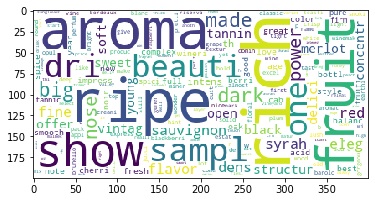

In [53]:
cleaned_count = Counter(cleaned_output)
wc = WordCloud(background_color='white').generate_from_frequencies(cleaned_count)
plt.imshow(wc)

In [54]:
#after performing preprocessing on the wine words - i'm going to put all of the steps together to create a cleaned list of words
#from the wine description set - from there, I can split up into top varieties like I did previously
rem_words = ["wine", "blend", "pinot", "chardonnay"]
stops2 = set(stopwords.words("english") + rem_words)
text = wine['description'].to_string()
tokens = [w for w in word_tokenize(text.lower())if w.isalpha()]
cleaned_wine = [w for w in tokens if not w in stops2]

In [55]:
#lemmatizing step
cleaned_output = [lemmatizer.lemmatize(w) for w in cleaned_wine]

In [56]:
#stemming step
cleaned_output = [ps.stem(w) for w in cleaned_output]

In [57]:
Counter(cleaned_output).most_common(5)
#so after performing pre-processing on wine data, we can see aroma, ripe, fruit, rich are top words. Also dri is showing up
#why is the stem of dry based on previous data - lets word cloud this 

[('aroma', 13921),
 ('ripe', 7842),
 ('fruit', 7566),
 ('rich', 6603),
 ('dri', 6355)]

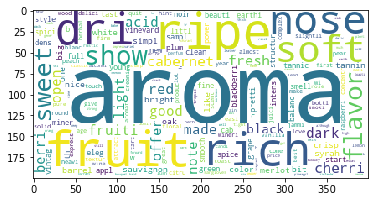

In [58]:
cleaned_count = Counter(cleaned_output)
wc = WordCloud(background_color='white').generate_from_frequencies(cleaned_count)
plt.imshow(wc)
#looking at the word cloud, there are some words that may want to consider removing due to vagueness such as aroma, rich, ripe
#soft, show, cabernet - these are not very descriptive and may pose problems once modeling. 
#also may want to perform pre-processing steps on popular varietals like chardonnay and pinot noir to perform modeling on them 
#to get variety specific data

In [59]:
#going to recreate the steps but remove some additional stop words so that I can use this set of words for my stats section
rem_words2 = ["wine", "blend", "pinot", "chardonnay", "cabernet", "aroma", "show"]

In [60]:
stops3 = set(stopwords.words("english") + rem_words2)

In [61]:
text = wine['description'].to_string()

In [62]:
tokens2 = [w for w in word_tokenize(text.lower())if w.isalpha()]

In [63]:
cleaned_wine2 = [w for w in tokens2 if not w in stops3]

In [64]:
cleaned_output2 = [lemmatizer.lemmatize(w) for w in cleaned_wine2]

In [65]:
#cleaned_output2 = [ps.stem(w) for w in cleaned_output2]
#removing the stemming attribute as not effective for this dataset - 
#lemmatizing is more effective 

In [66]:
Counter(cleaned_output2).most_common(10)

[('aroma', 13006),
 ('ripe', 7584),
 ('fruit', 7524),
 ('nose', 6109),
 ('rich', 6079),
 ('dry', 5628),
 ('soft', 5429),
 ('sweet', 5035),
 ('flavor', 4680),
 ('cherry', 4177)]

In [67]:
cleaned_count = Counter(cleaned_output2)

In [68]:
descList = list()
desc = " ".join(cleaned_output2) 
descList.append(desc)

In [69]:
#lets make a list of top 1500 words to use for predictions 
from sklearn.feature_extraction.text import CountVectorizer
max_features = 1500
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(descList)

In [70]:
sparce_matrix = sparce_matrix.toarray()

In [71]:
#print("Most Frequent {} Words: {}".format(max_features, count_vectorizer.get_feature_names()))

In [72]:
#going to use lambda functions because need to add these descriptions back into original dataset for analysis
import re
wine['description']= wine['description'].str.lower()
wine['description']= wine['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))

In [73]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
wine_descriptions = wine['description'].apply(tokenizer.tokenize)
wine_descriptions.head()

0    [this, tremendous, varietal, wine, hails, from...
1    [ripe, aromas, of, fig, blackberry, and, cassi...
2    [mac, watson, honors, the, memory, of, a, wine...
3    [this, spent, months, in, new, french, oak, an...
4    [this, is, the, top, wine, from, la, b, gude, ...
Name: description, dtype: object

In [74]:
stopword_list = stopwords.words('english')
ps = PorterStemmer()
wine_descriptions = wine_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
wine_descriptions = wine_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
wine['description_cleaned'] = wine_descriptions.apply(lambda elem: ' '.join(elem))
#the description cleaned column can be used now for inferential stats  and modeling

In [75]:
wine.head()

,Unnamed: 0,country,description,points,price,province,variety,description_cleaned
0,0,US,this tremendous varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,tremend variet wine hail oakvil age three year...
1,1,Spain,ripe aromas of fig blackberry and cassis are ...,96,110.0,Northern Spain,Tinta de Toro,ripe aroma fig blackberri cassi soften sweeten...
2,2,US,mac watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,mac watson honor memori wine made mother treme...
3,3,US,this spent months in new french oak an...,96,65.0,Oregon,Pinot Noir,spent month new french oak incorpor fruit ponz...
4,4,France,this is the top wine from la b gude named aft...,95,66.0,Provence,Provence red blend,top wine la b gude name highest point vineyard...


In [76]:
#scatter plot of price verse 

In [77]:
#based on the course work, I can train supervised learning models using my bag of words data or tf-idf. since I created bag of words
#I think I will use those models 
#inferential stat section - since I saw that points and price seemed pretty correlated, going to run some stats on this
cov_matrix = np.cov(wine['price'], wine['points'])
wine_cov = cov_matrix[0,1]
print(wine_cov)
#covariance shows these variables are related although not as strongly as expected

50.8075962297653


In [78]:
from scipy.stats import linregress
linregress(wine['price'], wine['points'])
#getting some summary stats from linregress, we can see the r-value is .45 so these variables are moderately correlated

LinregressResult(slope=0.04159286025495854, intercept=86.49342803018081, rvalue=0.45112003306666804, pvalue=0.0, stderr=0.00021182125388657626)

In [79]:
#pearson coefficient
from scipy import stats
stats.pearsonr(wine['price'], wine['points'])

(0.4511200330666678, 0.0)

In [80]:
#spearman coefficient
stats.spearmanr(wine['price'], wine['points'])
#we see that the spearman coefficient is the highest at .587

SpearmanrResult(correlation=0.587909821009001, pvalue=0.0)

In [81]:
#going to do some poisson distributions focused on wine price - going to adjust the points to see the difference
wine_mean = np.mean(wine['price'])
wine_pois = np.random.poisson(wine_mean, size=10000)
print(wine_mean)
#so the mean price of all wines - 33.5

33.54365718268387


In [82]:
print(np.mean(wine_pois)) 
#the poisson distribution also returned a mean of 33.5

33.4613


In [83]:
#let's look at the price for wines that have a point 90 and greater to see the difference
wine_great = wine[wine.points >= 90]
wine_great = wine_great['price']
wine_great_mean = np.mean(wine_great)
print(wine_great_mean)
#the mean price for wines 90 points and higher is 52.7, so considerably higher

52.71096624716112


In [84]:
wine_great_pois = np.random.poisson(wine_great_mean, size=10000)
print(np.mean(wine_great_pois))
#we can see the mean of the poisson distribution is very similiar 

52.7016


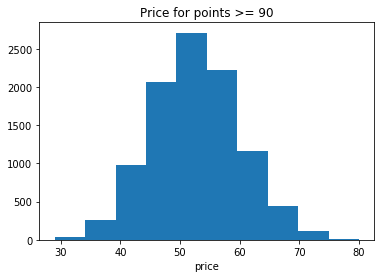

In [85]:
_ = plt.hist(wine_great_pois)
_ = plt.xlabel("price")
_ = plt.title("Price for points >= 90")
plt.show()
#we can see looking at the poisson distribution that the maority is between closely centered around that 45 - 62 range

In [86]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [87]:
wine_great.sort_values().tail(20)

41524      800.0
32453      800.0
119524     800.0
2145       848.0
10505      850.0
28625      850.0
127773     850.0
90744      900.0
10886      980.0
35531     1000.0
10651     1100.0
34927     1100.0
34942     1200.0
34939     1300.0
83536     1400.0
26296     1400.0
51886     1400.0
34922     1900.0
13318     2013.0
34920     2300.0
Name: price, dtype: float64

In [88]:
wine_great.describe()
#looking at the wine price data greater than 90 points, we can see that the max price is 2300 and low is 5 so very large spread. 
#the top 20 most expensive range from 800-2300 - definitely throwing data off since STD is so high, it is equal to the mean

count    48203.000000
mean        52.710966
std         52.069572
min          5.000000
25%         29.000000
50%         42.000000
75%         60.000000
max       2300.000000
Name: price, dtype: float64

In [89]:
#wanted to compute PMF/ ECDF for the wines with points over 90 but am getting a very large STD - i'm going to remove outlier
wine_great_mean = np.mean(wine_great)
wine_std = np.std(wine_great)
wine_dist = np.random.normal(wine_great_mean, wine_std, size=10000)

C:\Users\lacey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


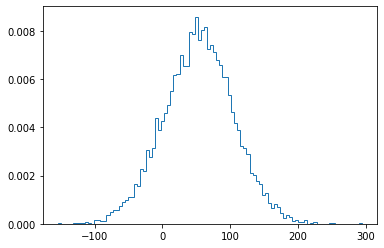

In [90]:
_ = plt.hist(wine_dist, normed=True, histtype='step', bins=100)
#you can see the data is coming out odd since the STD is so high - we have some negative numbers so need to remove outliers

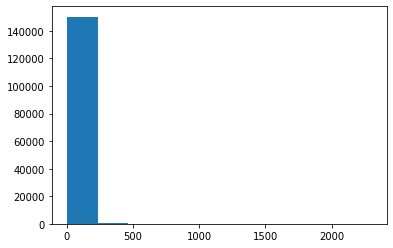

In [91]:
#going to plot the prices to see what the distribution looks like - you can see majority is below 500 - going to remove anything
#above 500
_ = plt.hist(wine['price'])
plt.show()

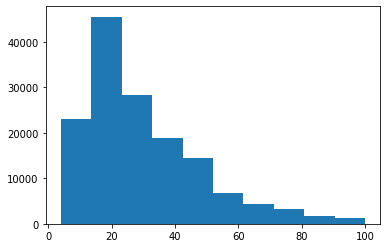

In [92]:
wine6 = wine[wine.price <= 100]
_ = plt.hist(wine6['price'])
plt.show()
#distribution looks better but still some outlies beyond 100

In [93]:
#performing random distribution 
wineg = wine[wine.points >= 90]
wineg = wine[wine.price <=500]
wineg = wine['price']
wine_great_mean6 = np.mean(wineg)
wine_std6 = np.std(wineg)
wine_dist6 = np.random.normal(wine_great_mean6, wine_std6, size=10000)

C:\Users\lacey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


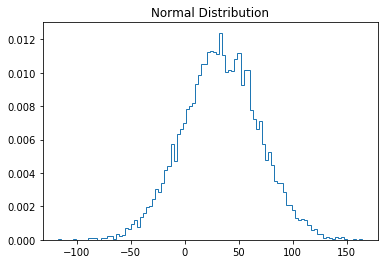

In [94]:
_ = plt.hist(wine_dist6, normed=True, histtype='step', bins=100)
_ = plt.title("Normal Distribution")

In [95]:
#going to also do some bootstrapping of the prices greater than 90 since the data is so widespread
Replications = np.array([np.random.choice(wine_great, len(wine_great), replace = True) for _ in range(10000)])
Mean = np.mean(Replications, axis=1)
conf_int = np.percentile(Mean, [2.5, 97.5])
print(conf_int)
#we can see after bootstrapping that the confidence is 52.2 to 53.2

[52.26561878 53.17527829]


In [96]:
print(wine_std6)

34.95050793742128


In [97]:
wineg.describe()

count    150904.000000
mean         33.543657
std          34.950624
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [98]:
#ANOVA test doing first one on price and variety
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('price ~ variety', data=wine).fit()
#print(results.summary())

In [99]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table
#so looking at the OLS table - the r**2 is pretty low .110 so doesnt seem to correlated - also looking at the annova summary table 
#sum of squares is very low and variance is high. probablity is also low

,sum_sq,df,F,PR(>F)
variety,2.023507e+07,618.0,29.986353,0.0
Residual,1.640999e+08,150285.0,NaN,NaN


In [100]:
#lets try looking at different factors such as points and province to see if these are related
results2 = ols('points ~ province', data=wine).fit()

In [101]:
#print(results2.summary())

In [102]:
aov_table2 = sm.stats.anova_lm(results2, typ=2)
aov_table2
#so it actually looks like these are less correlated 

,sum_sq,df,F,PR(>F)
province,1.966595e+05,454.0,47.558573,0.0
Residual,1.370312e+06,150449.0,NaN,NaN


In [103]:
results3 = ols('points ~ variety', data=wine).fit()
#print(results3.summary())

In [104]:
aov_table3 = sm.stats.anova_lm(results3, typ=2)
aov_table3

,sum_sq,df,F,PR(>F)
variety,1.574639e+05,618.0,27.166948,0.0
Residual,1.409508e+06,150285.0,NaN,NaN


In [105]:
#print(results3.summary())

Pearson Correlation: (0.4511200330666678, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                          1.482e+05
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                        0.00
Time:                        16:52:49   Log-Likelihood:                     -8.3806e+05
No. Observations:              150904   AIC:                                  1.676e+06
Df Residuals:                  150903   BIC:                                  1.676e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

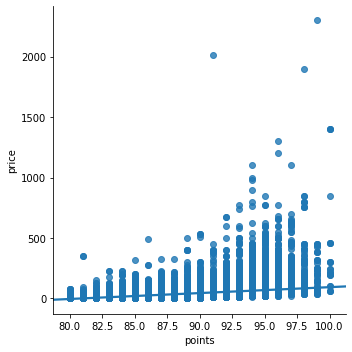

In [106]:
#let's see how price and points are correlated
from scipy.stats import pearsonr
print("Pearson Correlation:", pearsonr(wine.price, wine.points))
print(sm.OLS(wine.points, wine.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=wine)
#we can see nice correlation between price and points - .495 r squared

In [107]:
#when trying to run ANOVA test on description_cleaned - getting memory error - need to see how to work around this
#created bag of words but cant run anova with that as not part of dataset
#lets use count vectorizer along with train test split to see if description can be used to predict variety
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
y = wine['variety']
X_train, X_test, y_train, y_test = train_test_split(wine['description'], y, test_size=0.33, random_state=53)


In [108]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values) 

In [109]:
#lets see how predictive this is 
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#can see accuracy score is 53% based on classifier used comparing wine description to variety - decent score right off the bat

0.5341472720335749

In [110]:
#lets stry to run same naives bayes model on the cleaned description column I created to see if that increases the accuracy
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [111]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#we can see the accuracy score increased slightly using the stemmed/ pre-processed data

0.539910439968674

In [112]:
#modeling with NB is pretty good with cleaned column created - variety and description have a good relationship - need to see what
#modeling can be done with the bag of words I have created - also may want to do some linear regressions on points and price as they 
#had a strong correlation
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
x = wine['points']
y = wine['price']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x = preprocessing.scale(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LN = LinearRegression()
LN.fit(X_train, y_train)
y_pred = (LN.predict(X_test))
r2_score(y_test, y_pred)
#looking at the linear regression for points and price, they have a fairly low r**2 but seems like price outliers are throwing off
#going to remove and re-run

0.19730547232986761

In [113]:
#re-running regression with price outliers removed
x = wine6['points']
y = wine6['price']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x = preprocessing.scale(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LN = LinearRegression()
LN.fit(X_train, y_train)
y_pred = (LN.predict(X_test))
r2_score(y_test, y_pred)
#I can see that removing outliers has increased R**2 - could still remove some outliers as seems majority are not over 100 USD 

0.2959810954689801

In [114]:
#re-running regression with price outliers removed
x = wine6['points']
y = wine6['price']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression() 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(regr.score(X_test, y_test))

0.2960623239079574


In [115]:
wine6.head()

,Unnamed: 0,country,description,points,price,province,variety,description_cleaned
2,2,US,mac watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,mac watson honor memori wine made mother treme...
3,3,US,this spent months in new french oak an...,96,65.0,Oregon,Pinot Noir,spent month new french oak incorpor fruit ponz...
4,4,France,this is the top wine from la b gude named aft...,95,66.0,Provence,Provence red blend,top wine la b gude name highest point vineyard...
5,5,Spain,deep dense and pure from the opening bell th...,95,73.0,Northern Spain,Tinta de Toro,deep dens pure open bell toro winner aroma dar...
6,6,Spain,slightly gritty black fruit aromas include a s...,95,65.0,Northern Spain,Tinta de Toro,slightli gritti black fruit aroma includ sweet...


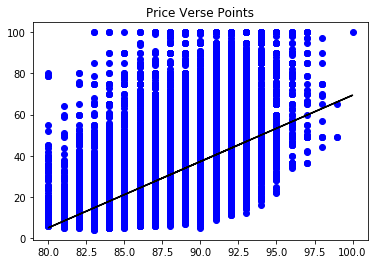

In [116]:
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
plt.title("Price Verse Points")
plt.show()

In [117]:
#running the naives bayes classifier, I saw that description is correlated to variety - lets see if the description is correlated
#to other features such as points/ price
y = wine['points']
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [118]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#so the accuracy is not so high between description and points 

0.28424265547500954

In [181]:
#let's see if there is a relationship between the top three wine variety points and description to see if that improves the model
wine_update3 = wine.set_index('variety').loc[['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon']]
wine_update3 = wine_update3.reset_index()
y = wine_update3['points']
X_train, X_test, y_train, y_test = train_test_split(wine_update3['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [182]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#we can see that focusing on the top three varieties did improve the model

0.32298272468838835

In [119]:
#I also want to eplore the relationship between points and region to see the relationship
y = wine['points']
X_train, X_test, y_train, y_test = train_test_split(wine['country'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [120]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#running the data, it doesn't seem like there is a strong correlation but want to try regions next

0.1390790979738549

In [121]:
#regions and points to see if there is a correlation 
y = wine['points']
X_train, X_test, y_train, y_test = train_test_split(wine['province'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [122]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#so we see that there is a relationship between points and regions but not a super strong one. 

0.14897889515853732

In [123]:
#using the multinomial NB on description and price - cannot get model to work because mixed data
from sklearn.naive_bayes import GaussianNB 
y = wine['price']
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [124]:
#nb_classifier = MultinomialNB()
#nb_classifier.fit(count_train, y_train)
#pred = nb_classifier.predict(count_test)
#metrics.accuracy_score(y_test, pred)

In [125]:
from sklearn import linear_model
#attempting to try SGD classifier but not working with description and price
#clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
#clf.fit(count_train, y_train)

In [126]:
#let's do a tf-idf model to see most important words 
from gensim.corpora.dictionary import Dictionary
wine_dict = Dictionary(wine_descriptions)

C:\Users\lacey\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [127]:
#wine_dict.token2id

In [128]:
#creating the corpus
corpus = [wine_dict.doc2bow(doc) for doc in wine_descriptions]

In [129]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf[corpus[1]]
#have built corpus and TfidModel - need to explore top important words 

[(3, 0.09819021765829829),
 (11, 0.05379770987500057),
 (13, 0.03827022257220438),
 (22, 0.07355566672757846),
 (34, 0.06315802962024747),
 (35, 0.15837681294245257),
 (36, 0.08286314997278198),
 (37, 0.09193081424645497),
 (38, 0.14129625220352865),
 (39, 0.1126266839614512),
 (40, 0.22134744576554485),
 (41, 0.2909289385893561),
 (42, 0.0756767722408199),
 (43, 0.4595047731293849),
 (44, 0.19791715394519543),
 (45, 0.02731039768450058),
 (46, 0.1059949346951305),
 (47, 0.2563609000270334),
 (48, 0.27382163068260956),
 (49, 0.12458483276670589),
 (50, 0.14378663380080142),
 (51, 0.17356872831245193),
 (52, 0.07979639801796024),
 (53, 0.07579960375596557),
 (54, 0.3466351507785532),
 (55, 0.19939710080709785),
 (56, 0.07734751635746875),
 (57, 0.2797110395399278),
 (58, 0.16463333199844207),
 (59, 0.10732142607240898)]

In [130]:
tfidf_corp = tfidf[corpus[1]]

In [131]:
tfidf_corp.sort()
print(tfidf_corp)

[(3, 0.09819021765829829), (11, 0.05379770987500057), (13, 0.03827022257220438), (22, 0.07355566672757846), (34, 0.06315802962024747), (35, 0.15837681294245257), (36, 0.08286314997278198), (37, 0.09193081424645497), (38, 0.14129625220352865), (39, 0.1126266839614512), (40, 0.22134744576554485), (41, 0.2909289385893561), (42, 0.0756767722408199), (43, 0.4595047731293849), (44, 0.19791715394519543), (45, 0.02731039768450058), (46, 0.1059949346951305), (47, 0.2563609000270334), (48, 0.27382163068260956), (49, 0.12458483276670589), (50, 0.14378663380080142), (51, 0.17356872831245193), (52, 0.07979639801796024), (53, 0.07579960375596557), (54, 0.3466351507785532), (55, 0.19939710080709785), (56, 0.07734751635746875), (57, 0.2797110395399278), (58, 0.16463333199844207), (59, 0.10732142607240898)]


In [132]:
import operator
list1 = sorted(tfidf_corp, key=operator.itemgetter(1))
print(list1)
#got list of words from tfidf model sorted by score - need to cross reference scores with corpus index to see top words 

[(45, 0.02731039768450058), (13, 0.03827022257220438), (11, 0.05379770987500057), (34, 0.06315802962024747), (22, 0.07355566672757846), (42, 0.0756767722408199), (53, 0.07579960375596557), (56, 0.07734751635746875), (52, 0.07979639801796024), (36, 0.08286314997278198), (37, 0.09193081424645497), (3, 0.09819021765829829), (46, 0.1059949346951305), (59, 0.10732142607240898), (39, 0.1126266839614512), (49, 0.12458483276670589), (38, 0.14129625220352865), (50, 0.14378663380080142), (35, 0.15837681294245257), (58, 0.16463333199844207), (51, 0.17356872831245193), (44, 0.19791715394519543), (55, 0.19939710080709785), (40, 0.22134744576554485), (47, 0.2563609000270334), (48, 0.27382163068260956), (57, 0.2797110395399278), (41, 0.2909289385893561), (54, 0.3466351507785532), (43, 0.4595047731293849)]


In [133]:
np.array(list1)
#looking at the array of scores, we can see that that tops are index 43, 54, 41, 57 

array([[4.50000000e+01, 2.73103977e-02],
       [1.30000000e+01, 3.82702226e-02],
       [1.10000000e+01, 5.37977099e-02],
       [3.40000000e+01, 6.31580296e-02],
       [2.20000000e+01, 7.35556667e-02],
       [4.20000000e+01, 7.56767722e-02],
       [5.30000000e+01, 7.57996038e-02],
       [5.60000000e+01, 7.73475164e-02],
       [5.20000000e+01, 7.97963980e-02],
       [3.60000000e+01, 8.28631500e-02],
       [3.70000000e+01, 9.19308142e-02],
       [3.00000000e+00, 9.81902177e-02],
       [4.60000000e+01, 1.05994935e-01],
       [5.90000000e+01, 1.07321426e-01],
       [3.90000000e+01, 1.12626684e-01],
       [4.90000000e+01, 1.24584833e-01],
       [3.80000000e+01, 1.41296252e-01],
       [5.00000000e+01, 1.43786634e-01],
       [3.50000000e+01, 1.58376813e-01],
       [5.80000000e+01, 1.64633332e-01],
       [5.10000000e+01, 1.73568728e-01],
       [4.40000000e+01, 1.97917154e-01],
       [5.50000000e+01, 1.99397101e-01],
       [4.00000000e+01, 2.21347446e-01],
       [4.700000

In [134]:
full_tfidf_corp = tfidf[corpus]
list2 = sorted(full_tfidf_corp, key=operator.itemgetter(1))

In [135]:
min(list2)

[(0, 0.04892858028125803),
 (10, 0.057775321541650194),
 (13, 0.017799175083674467),
 (27, 0.03159333693194281),
 (32, 0.013673755719085967),
 (33, 0.04727356515042159),
 (36, 0.03853898972151619),
 (52, 0.03711266786307687),
 (125, 0.09738537944921981),
 (142, 0.06127077760267562),
 (187, 0.07825661333922346),
 (195, 0.050717837631558814),
 (255, 0.04991586615060638),
 (288, 0.0459493601836181),
 (304, 0.07714146580844511),
 (438, 0.09113632239246329),
 (450, 0.06876921900536818),
 (454, 0.05846063539040558),
 (560, 0.0724240918602757),
 (615, 0.1123283852332033),
 (641, 0.07071737127390078),
 (667, 0.10059679778930361),
 (689, 0.16766536471441137),
 (764, 0.06691214298658178),
 (915, 0.08538078517721462),
 (917, 0.11260985037671899),
 (1026, 0.10476226067285493),
 (1028, 0.08008010330764216),
 (1327, 0.09289546506669444),
 (1454, 0.09102493156872184),
 (1545, 0.09396843408138938),
 (1591, 0.13935156697484688),
 (1881, 0.14016874615272784),
 (2008, 0.09632567240918163),
 (2048, 0.1085

In [136]:
#full_tfidf_corp.values.reshape(-1, 1)
#max(full_tfidf_corp, key=operator.itemgetter(1))

In [137]:
#max(list2)

In [138]:
#tried different ways of getting tfidf model to show values listed in ascending order, but not showing in matrix like desired
#going to try to vectorizer to see if that gets me a list that is cleaned 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(wine['description_cleaned'])

In [139]:
#for i, feature in enumerate(vectorizer.get_feature_names()):
   # print(i, feature)

In [140]:
sums = matrix.sum(axis=0)
terms = vectorizer.get_feature_names()

data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False).head(15))
#was able to rank the result from ths tfidf model and can see top words are wine, flavor, fruit, acid, finish, cherry, tannin
#dry, aroma

         term         rank
21212    wine  6607.974903
7037   flavor  6081.029707
7492    fruit  5704.858899
114      acid  4220.534530
6929   finish  4132.519846
3593   cherri  4066.382630
18772  tannin  3682.020426
5705      dri  3639.322179
969     aroma  3569.457087
15781    ripe  3425.437289
5713    drink  3316.628154
18579   sweet  3269.112081
15698    rich  3179.861447
17746   spice  3152.848167
1916    black  3086.599578


In [141]:
#after doing research on how to model a continue and categorical variable using naive bayes, I think the best option
#is to use binning of prices to create categories to then use for comparison - going to try that

In [142]:
wine['price'].describe()
#looking at the ranges - the min is 4 and the max is 2300 - the mean is also
#34 so will need to determine best binning strategies

count    150904.000000
mean         33.543657
std          34.950624
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

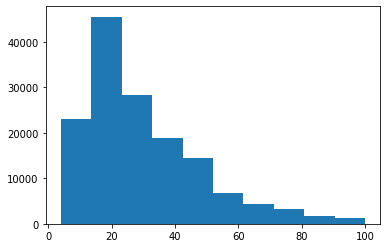

In [143]:
#I remember from the EDA that most wines were priced under 100, lets look at the distribution
wine6 = wine[wine.price <= 100]
_ = plt.hist(wine6['price'])
plt.show()
#okay so majority is 0-40 so that is an important target

In [144]:
bins = pd.IntervalIndex.from_tuples([(0,10), (10, 20), (20, 30), (30, 40), (40,50), (50,60), (60,70), (70,80), (80,90), (90,100), (100,2300)])
wine['price_binned'] = pd.cut(wine['price'], bins)
#split the wine prices up in 10 dollar increments and then everything over 100 was binned together

In [145]:
wine.head()

,Unnamed: 0,country,description,points,price,province,variety,description_cleaned,price_binned
0,0,US,this tremendous varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,tremend variet wine hail oakvil age three year...,"(100, 2300]"
1,1,Spain,ripe aromas of fig blackberry and cassis are ...,96,110.0,Northern Spain,Tinta de Toro,ripe aroma fig blackberri cassi soften sweeten...,"(100, 2300]"
2,2,US,mac watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,mac watson honor memori wine made mother treme...,"(80, 90]"
3,3,US,this spent months in new french oak an...,96,65.0,Oregon,Pinot Noir,spent month new french oak incorpor fruit ponz...,"(60, 70]"
4,4,France,this is the top wine from la b gude named aft...,95,66.0,Provence,Provence red blend,top wine la b gude name highest point vineyard...,"(60, 70]"


In [148]:
y = wine['price_binned']
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
#binning did not work with the model so seems like dtype is wrong 

In [150]:
wine.dtypes

Unnamed: 0                int64
country                  object
description              object
points                    int64
price                   float64
province                 object
variety                  object
description_cleaned      object
price_binned           category
dtype: object

In [152]:
wine['price_int'] = wine['price'].astype(np.int64)
#going to change the price category to int64 since I was able to succesfully model the points and description

In [154]:
wine.dtypes

Unnamed: 0                int64
country                  object
description              object
points                    int64
price                   float64
province                 object
variety                  object
description_cleaned      object
price_binned           category
price_int                 int64
dtype: object

In [155]:
y = wine['price_int']
X_train, X_test, y_train, y_test = train_test_split(wine['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [156]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#updating the dtype of price to int64, I was able to run through the model and can see score is very low so not a very strong relationship

0.16215185043876382

In [157]:
#the model of price verse description cleaned was not showing as a strong rleationship as model accuracy score is low - going 
#to remove some outliers (such as price) and see if that improves the model
wine_update = wine[wine.price <=100]
y = wine_update['price_int']
X_train, X_test, y_train, y_test = train_test_split(wine_update['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [158]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#limiting the price to 100 and below, we can see the model hardly improved 

0.16415579077176035

In [167]:
#going to try selecting only top wine varieties to see if that improves model, since those are the wines that would be targeted
wine_update2 = wine.set_index('variety').loc[['Chardonnay', 'Pinot Noir', 'Cabernet Sauvignon']]
wine_update2 = wine_update2.reset_index()
y = wine_update2['price_int']
X_train, X_test, y_train, y_test = train_test_split(wine_update2['description_cleaned'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [168]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#it does seem like focusing on the top three wine varieties has improved the model but still not very significant
#does not seem like description is very indicative of price. 

0.1856549311174284

In [177]:
#want to see if there is any relationship between country and price or province and price to see if these could be used for predicting price
y = wine_update['price_int']
X_train, X_test, y_train, y_test = train_test_split(wine_update['country'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [178]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#country and price have very low correlation

0.07797759736923235

In [179]:
y = wine_update['price_int']
X_train, X_test, y_train, y_test = train_test_split(wine_update['province'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [180]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
#price and region have a better relationship but still pretty low. 

0.10496351865173158